# Chapter 7. 딥러닝
# 07-1. 인공 신경망 (p.340)

In [ ]:
from tensorflow import keras
# tensorflow 사용

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# 텐서플로의 케라스 패키지를 임포트하고 패션 MNIST 데이터를 다운로드
# keras.datasets.fashion_mnist 모듈 아래 load_data()함수 => 훈련 데이터와 테스트 데이터를 나누어 반환

In [ ]:
train_input.shape
# 60000장의 데이터를 사용하겠다.

(60000, 28, 28)

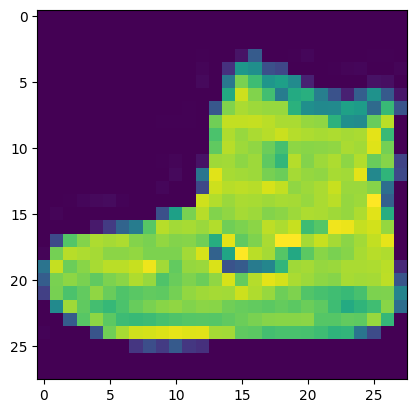

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_input[0])
# 우리가 가진 데이터의 0번째 데이터를 출력해보자.

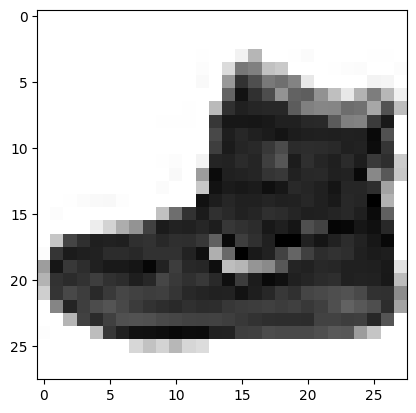

In [ ]:
plt.imshow(train_input[0], cmap='gray_r')
# 해당 데이터 이미지를 흑백으로 보여주세요.

딥러닝은 데이터가 충분해야 의미가 있다.

### 로즈스틱 회귀로 패션 아이템 분류하기
> p.344
- scale값조정: ( 수치 보정 ) 0부터 1사이의 수치로 표현하기 위해 255로 나눠주자.
- `tgrain_scaled = train_input / 255.0`


In [16]:
 train_scaled = train_input / 255.0
 train_scaled = train_scaled.reshape(-1, 28*28)
 # train_scaled = train_scaled.reshape(60000, 28*28)
 # 같은 의미의 코드 (-1을 쓴 이유는, 그 60000장의 데이터를 그대로 쓰겠다는 의미)

In [18]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=5)
# SGDClassifier 의 반복 횟수 (max_iter)를 5번으로
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
# 교차 검증을 위해
# 5개의 폴드로 나눠서 교차 검증

print(scores)

{'fit_time': array([10.37565374, 10.37523699, 11.19846702, 11.0156455 ,  7.9053359 ]), 'score_time': array([0.05881214, 0.08689356, 0.06072807, 0.04517412, 0.03136849]), 'test_score': array([0.82725   , 0.81483333, 0.82166667, 0.8255    , 0.80516667])}


In [20]:
# 로지스틱 회귀로 60000장의 데이터를 선형 방정식으로 출력해봄.

In [22]:
# 텐서플로와 케라스 (p.350)
import tensorflow as tf

### 인공 신경망으로 모델 만들기
> p. 352

In [24]:
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)
# 훈련 세트와 검증 세트로 나눔

In [25]:
# 인공 신경망의 `층` 만들기 (p.353)
# 출력층과 밀집층 (dense layer)
# 출력할 뉴런 개수, 뉴런의 출력에 적용할 함수, 입력의 크기 순으로 적어준다.

In [26]:
# 신경망: `뉴런` 만들기

dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))
# 활성화 함수 activation = 뉴런의 출력에 적용할 함수: softmax 소프트 맥스 함수

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
# 위에서 만든 신경망을 사용할려면 모델로 만들어줘야한다.

model = keras.Sequential([dense]) # => dense는 리스트로 넣어 줘야한다.

# 그동안은 사용할 모델을 가져다가 썼다.
# 하지만 딥러닝에서는 모델을 내가 구축해줘야한다.
#
# 나는 dense층 1개를 가진 모델을 만든 것이다.

In [33]:
# compile이라는 단계를 지정해주기
# 학습에 대한 `기준점`을 정해주는 과정

# 학습 방법도 내가 명시를 해줘야한다.

model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 손실함수

### 딥러닝에서 모델 구축/ 학습을 진행하는 과정 3단계!

> 1. 층을 만든다
>
> 2. 층을 등록해 모델을 만든다.
>
> 3. 학습하는 방향을 제시해준다.

In [34]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7152 - loss: 0.8425
Epoch 2/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8278 - loss: 0.5048
Epoch 3/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8409 - loss: 0.4657
Epoch 4/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8504 - loss: 0.4459
Epoch 5/5
1055/1055 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8531 - loss: 0.4367


In [37]:
model.evaluate(val_scaled, val_target)
# 이전 `머신러닝`에서의 scores랑 같은 함수: evaluate()
# 앞 숫자는 loss값으로 손실 정도, 뒤는 accuracy로 정확도를 의미한다.

352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8371 - loss: 0.4670


[0.45494499802589417, 0.8404444456100464]

#### <머신러닝>: 인공신경망 - 나만의 모델을 만든다!